# How to score ---- in Titanic Kaggle Challenge

I am sharing my solution for my first Kaggle competition. As it stands now I am ranked among the top -- of all competitors for the Titanic Kaggle Challenge. In this competition, the challenge is to complete the analysis of what sorts of people were likely to survive. In particular, the challenge is to apply the tools of machine learning to predict which passengers survived the tragedy based on a set of variables such as age, sex, or passenger class on the boat.

The main libraries I used in this tutorial are:
Pandas: for data manipulation
Matplotlib and seaborn: for data visualization
Numpy: for multidimensional array computing
sklearn: for machine learning and predictive modeling

## I - Exploratory data analysis

We will be performing the following four things in this section.

* Data extraction : Load the dataset and take a look at it
* Cleaning : Replacing the missing values
* Plotting : Creating some interesting charts that will help us in spotting correlations and hidden insights out of the data.

Assumptions : we'll formulate hypotheses from the charts.

We will start by imporing the usefful libraries

In [112]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_columns=100
pd.options.display.max_rows=100

Training and test datasets for this competition can be downloaded from the kaggle webiste  https://www.kaggle.com/c/titanic/data We will be using the training set to build our predictive model and the testing set to score it and generate an output file to submit on the Kaggle evaluation system.
Lets import the training set.

In [113]:
df = pd.read_csv('train.csv')

Using pandas we can have a sneak view of the data

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The variable descriptions are:

survival        Survival of the passenger
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

Pandas describe method generates various summary statistics, excluding NaN values.

                

In [115]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we can observe from the count row that 177 entries are missing in the Age column


In [116]:
df["Age"] = df["Age"].fillna(df["Age"].median())


Lets check the data again.

In [117]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


All passngers have now age
Now lets make some visualizations:

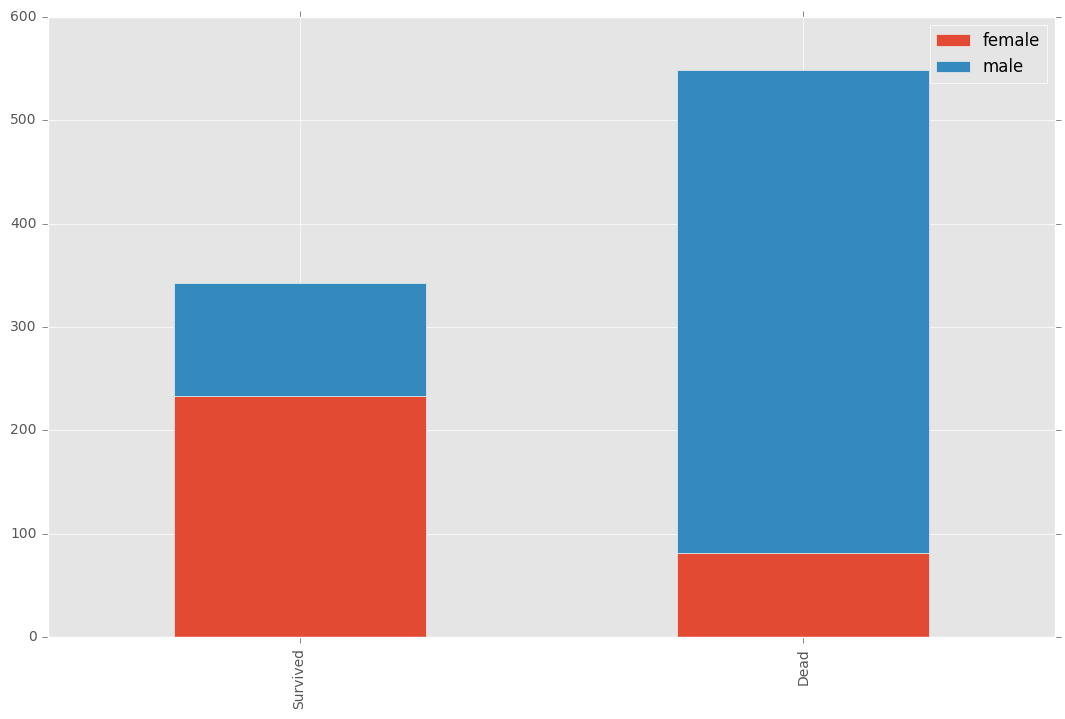

In [118]:

survived_sex = df[df['Survived']==1]['Sex'].value_counts()
dead_sex = df[df['Survived']==0]['Sex'].value_counts()
sex_df = pd.DataFrame([survived_sex,dead_sex])
sex_df.index = ['Survived', 'Dead']
sex_df.plot(kind='bar',stacked=True, figsize=(13,8))

    

We can understand from this plot that women have higher probability of surviving than men.

As a second step lets now correlate the survival with the age variable.

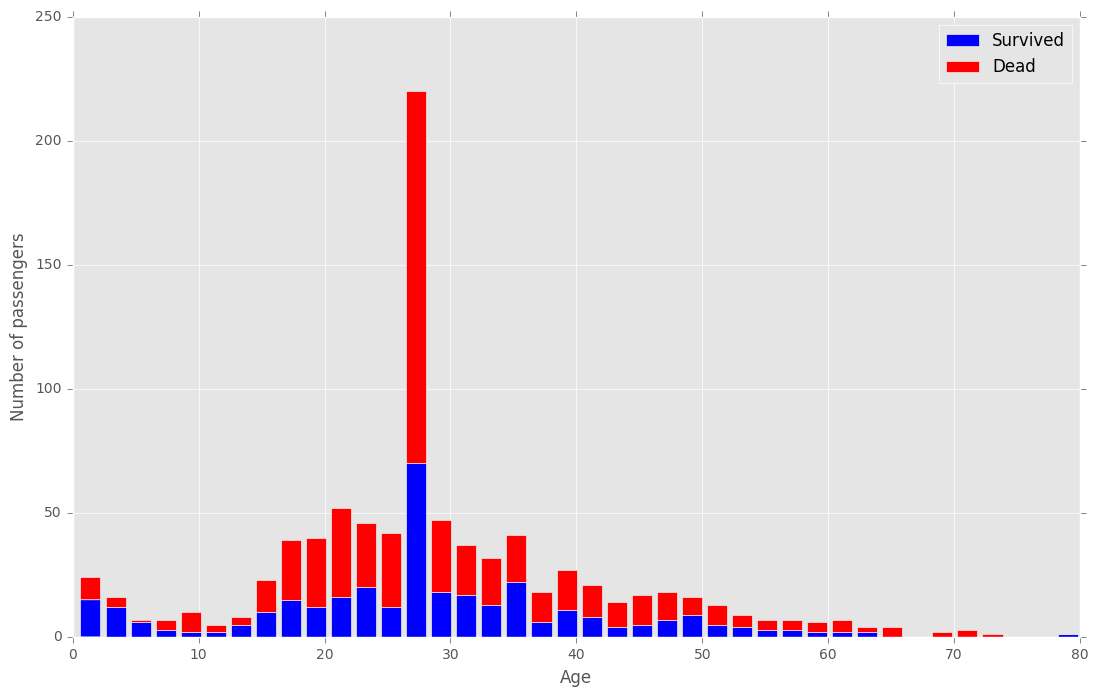

In [119]:
plt.figure(figsize=(13,8))
plt.hist([df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']], stacked=True, color = ['b','r'],
         bins = 40,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()


As seen from the chart passnegers less than 10 years old are more likely to survive than more than 12 and less than 60.

Captains code of conduct in case of emergency like this is "Women and children first !". The baove two charts confirm this.

As a next step lets see if there is a coorelation between Fare ticker and survival.


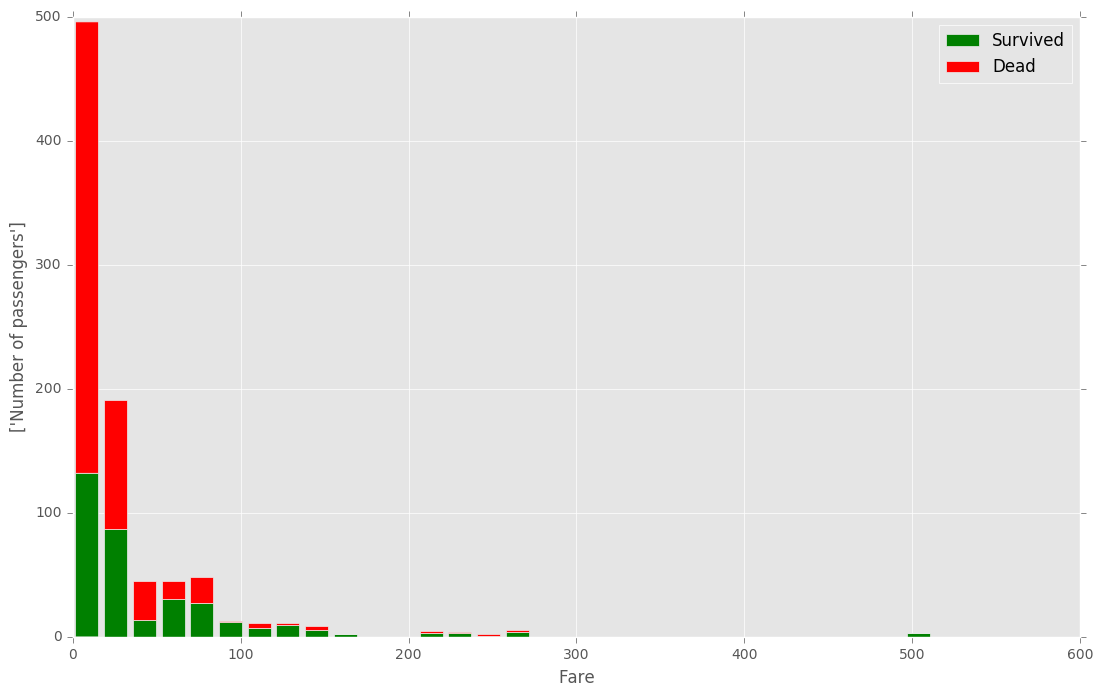

In [120]:
plt.figure(figsize=(13,8))
plt.hist([df[df["Survived"]==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color=['g','r'], bins= 30, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel(['Number of passengers'])
plt.legend()

As seen in the plot, passengers with a cheap ticket are more likely to die. 

Lets make another plot to see the survival rate with both features (Fare and Age)

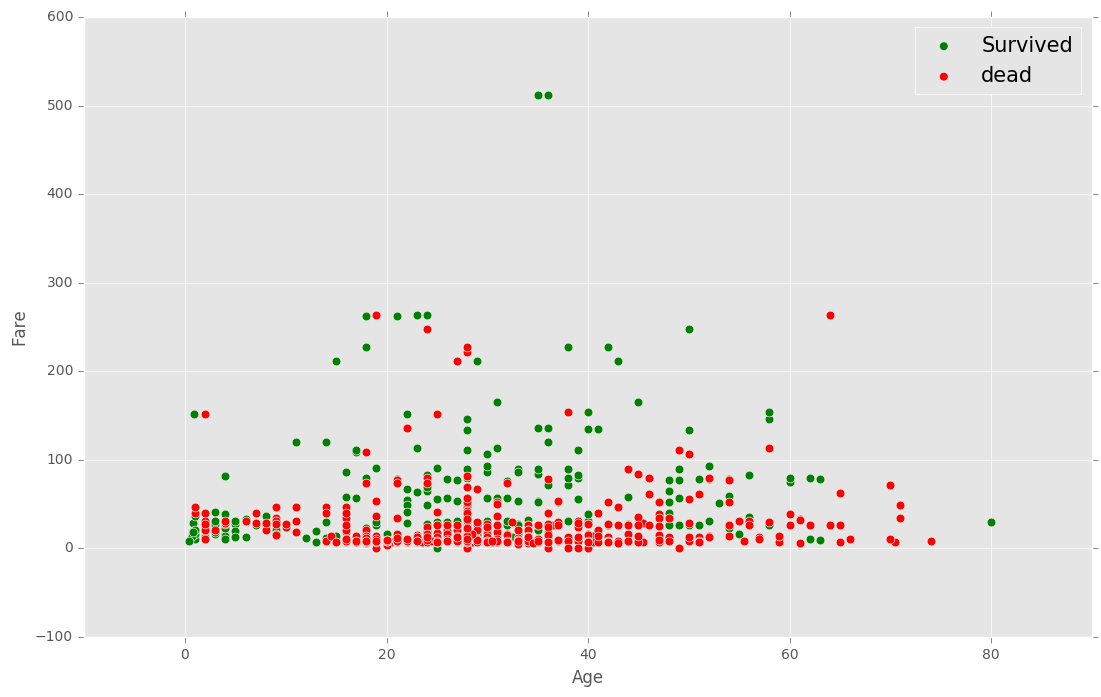

In [80]:
plt.figure(figsize=(13,8))
ax = plt.subplot()
ax.scatter(df[df['Survived']==1]['Age'], df[df['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(df[df['Survived']==0]['Age'], df[df['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Survived','dead'), scatterpoints=1,loc='upper right', fontsize=15)



We can observe from this plot passngers with age around 17-50 and low fare have higher probability of not surviving.

Next, lets see if how embarkation affects the survival.


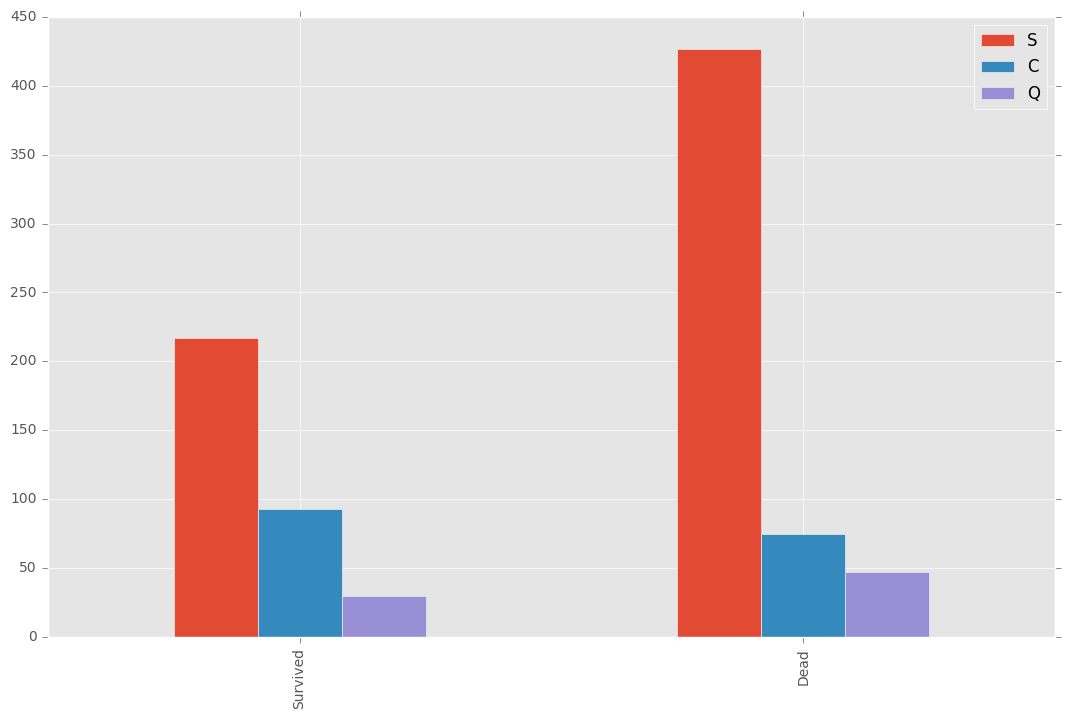

In [81]:
survived_embark = df[df['Survived']==1]['Embarked'].value_counts()
dead_embark = df[df['Survived']==0]['Embarked'].value_counts()
df_embarked = pd.DataFrame([survived_embark,dead_embark])
df_embarked.index = ['Survived', 'Dead']
df_embarked.plot(kind='bar',stacked=False, figsize=(13,8))





The survived and death ratio seems proporational with the embarked location. Hence we can say that there is no relation between embarked location and survival.

## I - Feature engineering

Here is the definition of feature engineering:

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

In this part we will start writing our code using separate functions for clarity.

### Combining the data

We will combine the training and test data sets to check if the test set have a featuere that doesnt exist in the training set. 




Lets first have a function for printing whether our feature is processed or not.

In [82]:
def status(feature):
    print 'Processing', feature, ': ok'

In [83]:
def get_combined_data():
    # reading the traingin and test datas
    train = pd.read_csv('data/train.csv')
    test = pd.read_csv('data/test.csv')
    # extracting and removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived', 1, inplace=True)
    
    # merging train data and test data for future engineering
    train_test_comibined  = train.append(test)
    train_test_comibined.reset_index(inplace=True)
    train_test_comibined.drop('index', inplace=True,axis=1)
    
    return train_test_comibined
    

In [84]:
combined = get_combined_data()

Lets see if they are combined

In [85]:
combined.shape

(1309, 11)

Perfefct ! they are combined.

Now lets have a look at the data.



In [86]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Extracting passenger titles

If you closely look at he names, you can notice that the names have titles with them. This info could be usefull for our prediction model. 

Braund, **Mr.** Owen Harris
Heikkinen, **Miss.** Laina
Oliva y Ocana, **Dona.** Fermina
Peter, **Master.** Michael J

So, lets take out that info and put it as a feature in the data.


In [87]:
def get_titles():
    global combined
    
    # extracting the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # lets have a map of possible titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
    }
    
    # mapping each title to the list
    combined['Title'] = combined.Title.map(Title_Dictionary)
    
    
    
    

Lets check it !

In [88]:
get_titles()

In [89]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Perfect, Title is added and mapped properly.

##  Processing Fare

In [90]:
def process_fares():
    global combined
    # once fare values is misssing, lets replace it with the mean
    combined.Fare.fillna(combined.Fare.mean(), inplace=True)
    status('fare')
    

In [91]:
process_fares()

Processing fare : ok


## Processing Embarked

In [92]:
def processing_embarked():
    global combined
    # there are two missing embarked value, lets fill them with the most frequent one (S)
    combined.Embarked.fillna('S', inplace=True)
    
    # dummy encoding
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.conact([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('Embarked')
    
    
    

## Processing Ages
We have seen earlier that we are missing 177 age values. Since this is quite a large proportion of the dataset, it is better to first check if there are other ways to fill the missing values before replaceing by mean or median.

Lets try to understand based on sex, Title and Passnger class. 


In [93]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

By looking at the median age, we can see that the median age differs based on Sex, Pclass and Title grouping.

For example:
    
    * If the passenger is female, from Pclass 1, and from officer the median age is 49.
    * If the passenger is male, from Pclass 3, and from Mr the median age is 26.

    

Now lets create a function that fills in the missing age value based on the median values of the groups.


In [94]:
def process_age():
    global combined
    
    def fill_ages(row):
        if row['Sex'] == 'female' and row['Pclass'] ==1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] =='Mrs':
                return 45
            elif row['Title'] =='Officer':
                return 49
            elif row['Title'] =='Royality':
                return 39
                
        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
                
    combined.Age = combined.apply(lambda r: fill_ages(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    status('age')

In [95]:
process_age()

Processing age : ok


In [96]:
Lets get info of our combined data

SyntaxError: invalid syntax (<ipython-input-96-52d26dfcad1c>, line 1)

In [97]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


Looks good, missing Age value are replaces.
We see that lots of missing values in the Cabin feature.

## Processing Sex

Sex is availble for all the data, but we would like to change to numreical one for later better processing.

In [98]:
def processing_sex(): 
    
    global combined
    #mapping male/female to 0/1 numerical values
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    
    status('sex')

The function maps the values male and female to 1 and 0 respectively. 

In [99]:
processing_sex()

Processing sex : ok


## Processing Pclass

In [100]:
def process_pclass():
    global combined
    # replacing pclass to numerical values
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
    #adding combined with the new pclass column
    combined = pd.concat([combined,pclass_dummies],axis=1)
    # removing the original pclass
    combined.drop('Pclass',axis=1,inplace=True)
    status('pclass')

In [101]:
process_pclass()

Processing pclass : ok


## Processing Ticket

This fucntion will extract the prefix of each ticket and returns 'XXX if there is no prefix otherwise will return the ticket number which is a digit

In [110]:
def process_ticket():
    global combined

    def clean_ticket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t:t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'XXX'
        
        # extracting dummy variable from the tickets:
        
    combined['Ticket'] = combined['Ticket'].map(clean_ticket)
    ticket_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, ticket_dummies],axis=1)
    combined.drop('Ticket',inplace=True,axis=1)
    
    status('ticket')    
        
    

In [111]:
After extracting the info the above function created a dummy encoding. Now lets process it

SyntaxError: invalid syntax (<ipython-input-111-a10ac505f206>, line 1)

In [104]:
process_ticket()

Processing ticket : ok


## Processing Cabin

In [105]:
def process_cabin():
    
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'],prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies],axis=1)
    
    combined.drop('Cabin',axis=1,inplace=True)
    
    status('cabin')

This function replaces NaN values with U (for Unknow). It then maps each Cabin value to the first letter. Then it encodes the cabin values using dummy encoding.

In [106]:
process_cabin()

Processing cabin : ok


## Processing Family

We will introduce a new features based on the family size.

The following are the definitions used in this competition for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic


In [109]:
def process_family():
    global combined
    # new feature family size from the features Parch and SibSib
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    
    # We will introduces function introduces 4 new features:
    # FamilySize : the total number of relatives including the passenger (him/her)self.
    # Sigleton : a boolean variable that describes families of size = 1
    # SmallFamily : a boolean variable that describes families of 2 <= size <= 4
    # LargeFamily : a boolean variable that describes families of 5 < size

    combined['Singleton'] = combined['FamilySize'].map(lambda s : 1 if s ==1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=3<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)
    
    status('family')
    
    

In [108]:
process_family()

Processing family : ok
